<a href="https://colab.research.google.com/github/surajss28/Data-Analysis-Project/blob/main/sales_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sales_data_project



In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3


### Connect to SQLite Database

In [18]:
df = pd.read_excel("/content/drive/MyDrive/sales_data_project.xlsx")
conn = sqlite3.connect("/content/drive/MyDrive/sales_data_project.db")

### Create SQLite DB

In [19]:
df.to_sql("sales_data", conn, if_exists="replace", index=False)

10000

### Preview Table Names

In [20]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Available Tables:\n", tables)


Available Tables:
          name
0  sales_data


### Sales by Region

In [21]:
query1 = """
SELECT region, SUM(sales_amount) AS total_sales
FROM sales_data
GROUP BY region
ORDER BY total_sales DESC;
"""
region_sales = pd.read_sql(query1, conn)
print(region_sales)

  region  total_sales
0   West   3829659.06
1  South   3811769.58
2  North   3783405.15
3   East   3678230.32


### Monthly Sales Trend

In [22]:
query2 = """
SELECT strftime('%Y-%m', order_date) AS month, SUM(sales_amount) AS total_sales
FROM sales_data
GROUP BY month
ORDER BY month;
"""
monthly_sales = pd.read_sql(query2, conn)

### Plot Monthly Sales

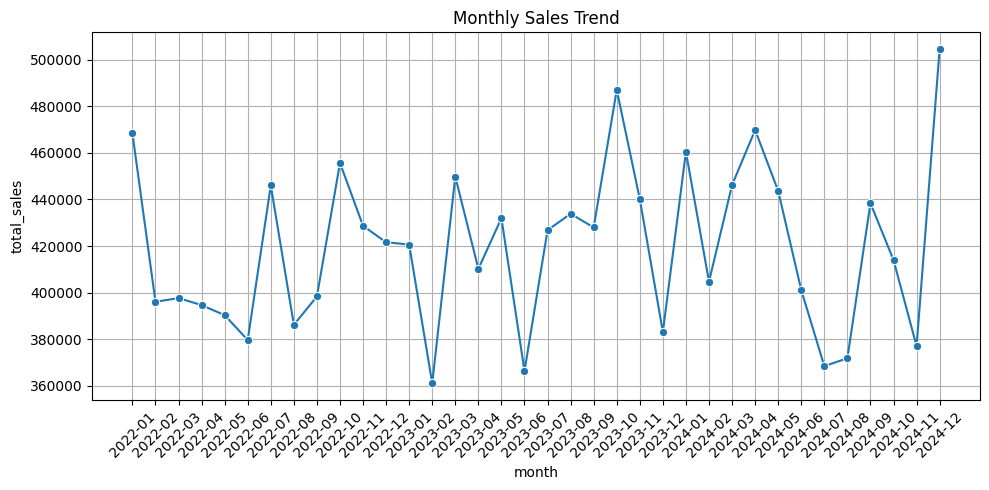

In [23]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x="month", y="total_sales", marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Top 5 Products by Revenue

In [24]:
query3 = """
SELECT product_name, SUM(sales_amount) AS total_revenue
FROM sales_data
GROUP BY product_name
ORDER BY total_revenue DESC
LIMIT 5;
"""
top_products = pd.read_sql(query3, conn)
print("Top 5 Products by Revenue:\n", top_products)

Top 5 Products by Revenue:
   product_name  total_revenue
0        Jeans     1733169.05
1       Laptop     1711815.45
2       Tablet     1701647.20
3        Shirt     1683594.40
4         Sofa     1682874.30


In [25]:
from prophet import Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplpue3eke/ey_c5arw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplpue3eke/_falb6b4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67747', 'data', 'file=/tmp/tmplpue3eke/ey_c5arw.json', 'init=/tmp/tmplpue3eke/_falb6b4.json', 'output', 'file=/tmp/tmplpue3eke/prophet_model6u7l81_4/prophet_model-20250610122111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:21:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


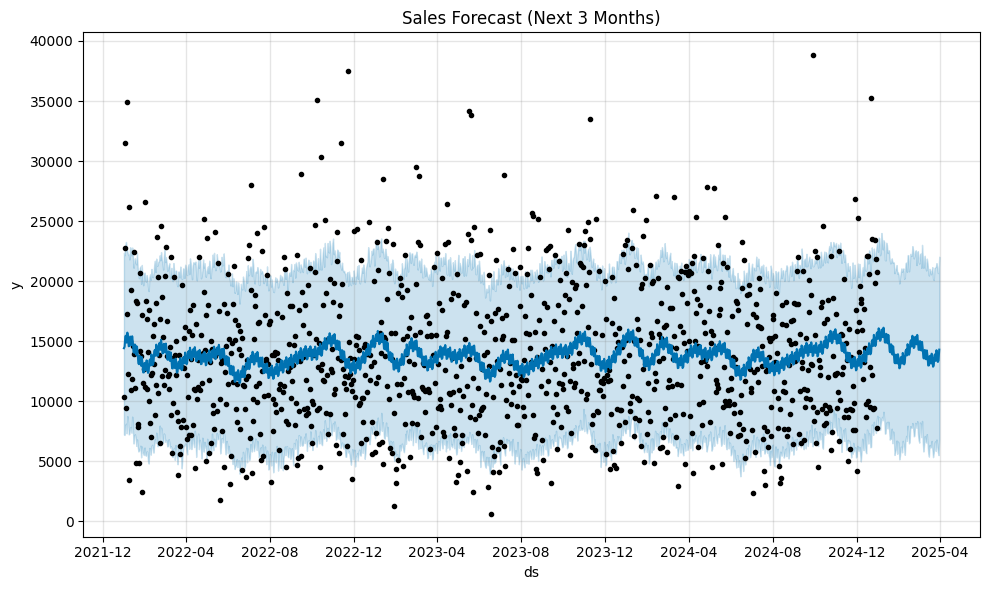

In [29]:
df_prophet = df.groupby('order_date')['sales_amount'].sum().reset_index()
df_prophet.columns = ['ds', 'y']

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

model.plot(forecast)
plt.title("Sales Forecast (Next 3 Months)")
plt.tight_layout()
plt.show()

# **Complete SQL Query Collection for Sales Analysis Project**

In [48]:
df = pd.read_excel("/content/drive/MyDrive/sales_data_project.xlsx")
conn = sqlite3.connect("/content/drive/MyDrive/sales_data_project.db")
df.to_sql("sales_data", conn, if_exists="replace", index=False)
df['order_id'] = range(1, len(df) + 1)

## 1. **Total Sales by Region**

### **Description:**  Summarizes total revenue by geographic region.

### **Use Case:** To identify which region is contributing the most revenue.

In [37]:
query4 = '''SELECT region, SUM(sales_amount) AS total_sales
FROM sales_data
GROUP BY region
ORDER BY total_sales DESC;
'''
region_sales = pd.read_sql(query4, conn)
print(region_sales)

  region  total_sales
0   West   3829659.06
1  South   3811769.58
2  North   3783405.15
3   East   3678230.32


## 2. **Monthly Sales Trend**

### **Description:**  Aggregates sales by month to track time-based performance.

### **Use Case:** Used in line charts and time-series trend analysis.

In [35]:
query5 = '''SELECT
               strftime('%Y-%m', order_date) AS month,
               SUM(sales_amount) AS total_sales
            FROM sales_data
            GROUP BY month
            ORDER BY month;
'''
monthly_sales = pd.read_sql(query5, conn)
print(monthly_sales)

      month  total_sales
0   2022-01    468445.14
1   2022-02    396087.01
2   2022-03    397683.35
3   2022-04    394675.80
4   2022-05    390353.80
5   2022-06    379672.71
6   2022-07    446021.23
7   2022-08    386211.41
8   2022-09    398377.04
9   2022-10    455687.96
10  2022-11    428668.94
11  2022-12    421649.92
12  2023-01    420649.01
13  2023-02    361089.80
14  2023-03    449786.58
15  2023-04    410213.14
16  2023-05    432006.91
17  2023-06    366352.12
18  2023-07    426826.96
19  2023-08    433862.85
20  2023-09    428015.17
21  2023-10    487054.13
22  2023-11    440148.90
23  2023-12    383102.55
24  2024-01    460494.36
25  2024-02    404720.86
26  2024-03    446228.29
27  2024-04    469801.57
28  2024-05    443674.47
29  2024-06    401125.06
30  2024-07    368483.37
31  2024-08    371836.65
32  2024-09    438397.05
33  2024-10    414018.62
34  2024-11    377081.84
35  2024-12    504559.54


## 3. **Top 5 Products by Revenue**

### **Description:**  Returns the top-grossing products.

### **Use Case:** Understand product performance and plan promotions.

In [44]:
query6 = '''SELECT
              product_name,
              SUM(sales_amount) AS total_revenue
            FROM sales_data
            GROUP BY product_name
            ORDER BY total_revenue DESC
            LIMIT 5;
'''
top_products_revenue = pd.read_sql(query6, conn)
print(top_products_revenue)

  product_name  total_revenue
0        Jeans     1733169.05
1       Laptop     1711815.45
2       Tablet     1701647.20
3        Shirt     1683594.40
4         Sofa     1682874.30


## 4. **Sales by Region and Product Category**

### **Description:**  Breaks down sales into a 2D matrix of regions vs categories.

### **Use Case:** Pivot-style summary to identify strong product areas in each region.

In [45]:
query7 = '''SELECT
    region,
    product_category,
    SUM(sales_amount) AS total_sales
FROM sales_data
GROUP BY region, product_category
ORDER BY region, total_sales DESC;
'''
sales_by_region_and_product_cat = pd.read_sql(query7, conn)
print(sales_by_region_and_product_cat)

   region product_category  total_sales
0    East         Clothing   1241169.63
1    East      Electronics   1231216.33
2    East        Furniture   1205844.36
3   North        Furniture   1320351.08
4   North      Electronics   1246445.77
5   North         Clothing   1216608.30
6   South         Clothing   1323288.41
7   South      Electronics   1258737.85
8   South        Furniture   1229743.32
9    West      Electronics   1347733.48
10   West         Clothing   1295131.63
11   West        Furniture   1186793.95


## 5. **Average Order Value (AOV) per Region**

### **Description:**  Calculates the average revenue generated per order.

### **Use Case:** Benchmark regional spending habits or marketing effectiveness.

In [47]:
df.head(3)

,order_date,region,state,product_category,product_name,quantity,unit_price,sales_amount
0,2023-05-17,North,Delhi,Clothing,Jeans,4,951.7,3806.8
1,2022-06-28,South,Karnataka,Clothing,Shirt,3,784.1,2352.3
2,2023-03-24,West,Maharashtra,Electronics,Laptop,5,172.9,864.5


In [46]:
query8 = '''SELECT
    region,
    ROUND(SUM(sales_amount) * 1.0 / COUNT(DISTINCT order_id), 2) AS average_order_value
FROM sales_data
GROUP BY region
ORDER BY average_order_value DESC;
'''
aov_per_region = pd.read_sql(query8, conn)
print(aov_per_region)

DatabaseError: Execution failed on sql 'SELECT 
    region, 
    ROUND(SUM(sales_amount) * 1.0 / COUNT(DISTINCT order_id), 2) AS average_order_value
FROM sales_data
GROUP BY region
ORDER BY average_order_value DESC;
': no such column: order_id